<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection_REM_NREM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/REM_NREM.csv")
X = data.iloc[:,1:76] #independent columns
y = data[['Sleep Stage']]   #target column 

In [10]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [13]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [14]:
featureScores

,Specs,Score
0,MeanP_Alpha_F4,3.045533
1,MedianF_Alpha_F4,54.860001
2,MeanF_Alpha_F4,1444.310230
3,Spectral Edge_Alpha_F4,1063.080293
4,PeakF_Alpha_F4,989.711468
...,...,...
70,MeanP_Gamma_O2,0.856045
71,MedianF_Gamma_O2,367.954960
72,MeanF_Gamma_O2,273.170152
73,Spectral Edge_Gamma_O2,426.030573


In [15]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs        Score
9            PeakF_Beta_F4  5974.560792
34           PeakF_Beta_C4  3802.124267
6          MedianF_Beta_F4  1901.689469
2           MeanF_Alpha_F4  1444.310230
31         MedianF_Beta_C4  1178.303860
3   Spectral Edge_Alpha_F4  1063.080293
4           PeakF_Alpha_F4   989.711468
27          MeanF_Alpha_C4   966.498298
33   Spectral Edge_Beta_C4   923.028755
23  Spectral Edge_Gamma_F4   810.752567


In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs        Score
9            PeakF_Beta_F4  5974.560792
34           PeakF_Beta_C4  3802.124267
6          MedianF_Beta_F4  1901.689469
2           MeanF_Alpha_F4  1444.310230
31         MedianF_Beta_C4  1178.303860
3   Spectral Edge_Alpha_F4  1063.080293
4           PeakF_Alpha_F4   989.711468
27          MeanF_Alpha_C4   966.498298
33   Spectral Edge_Beta_C4   923.028755
23  Spectral Edge_Gamma_F4   810.752567


In [17]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01571637 0.01537857 0.03018863 0.01893436 0.0120513  0.01426719
 0.02464299 0.01559406 0.01562308 0.01594347 0.01265919 0.01058032
 0.01486386 0.01552478 0.00795805 0.01040842 0.01108055 0.01452005
 0.01725086 0.0121969  0.01191666 0.01538631 0.01845063 0.01417244
 0.00901707 0.01467887 0.01231679 0.018694   0.01337791 0.01097508
 0.01519777 0.01918864 0.01514391 0.0157952  0.01224665 0.0139305
 0.01253728 0.01463144 0.01120979 0.009272   0.01316386 0.0140031
 0.0165934  0.01885822 0.00992414 0.01188753 0.01295163 0.01484308
 0.01190622 0.0092988  0.0122029  0.0122471  0.01245464 0.01088653
 0.00910999 0.01120951 0.01209254 0.01286421 0.01297264 0.00963281
 0.01375704 0.01175014 0.01139147 0.01553388 0.00821225 0.01060042
 0.00874964 0.01278356 0.0102249  0.00765346 0.01102549 0.01354925
 0.01307882 0.01170322 0.00736167]


In [ ]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
#plt.show()
#print(featureScores.nlargest(10,'Score'))

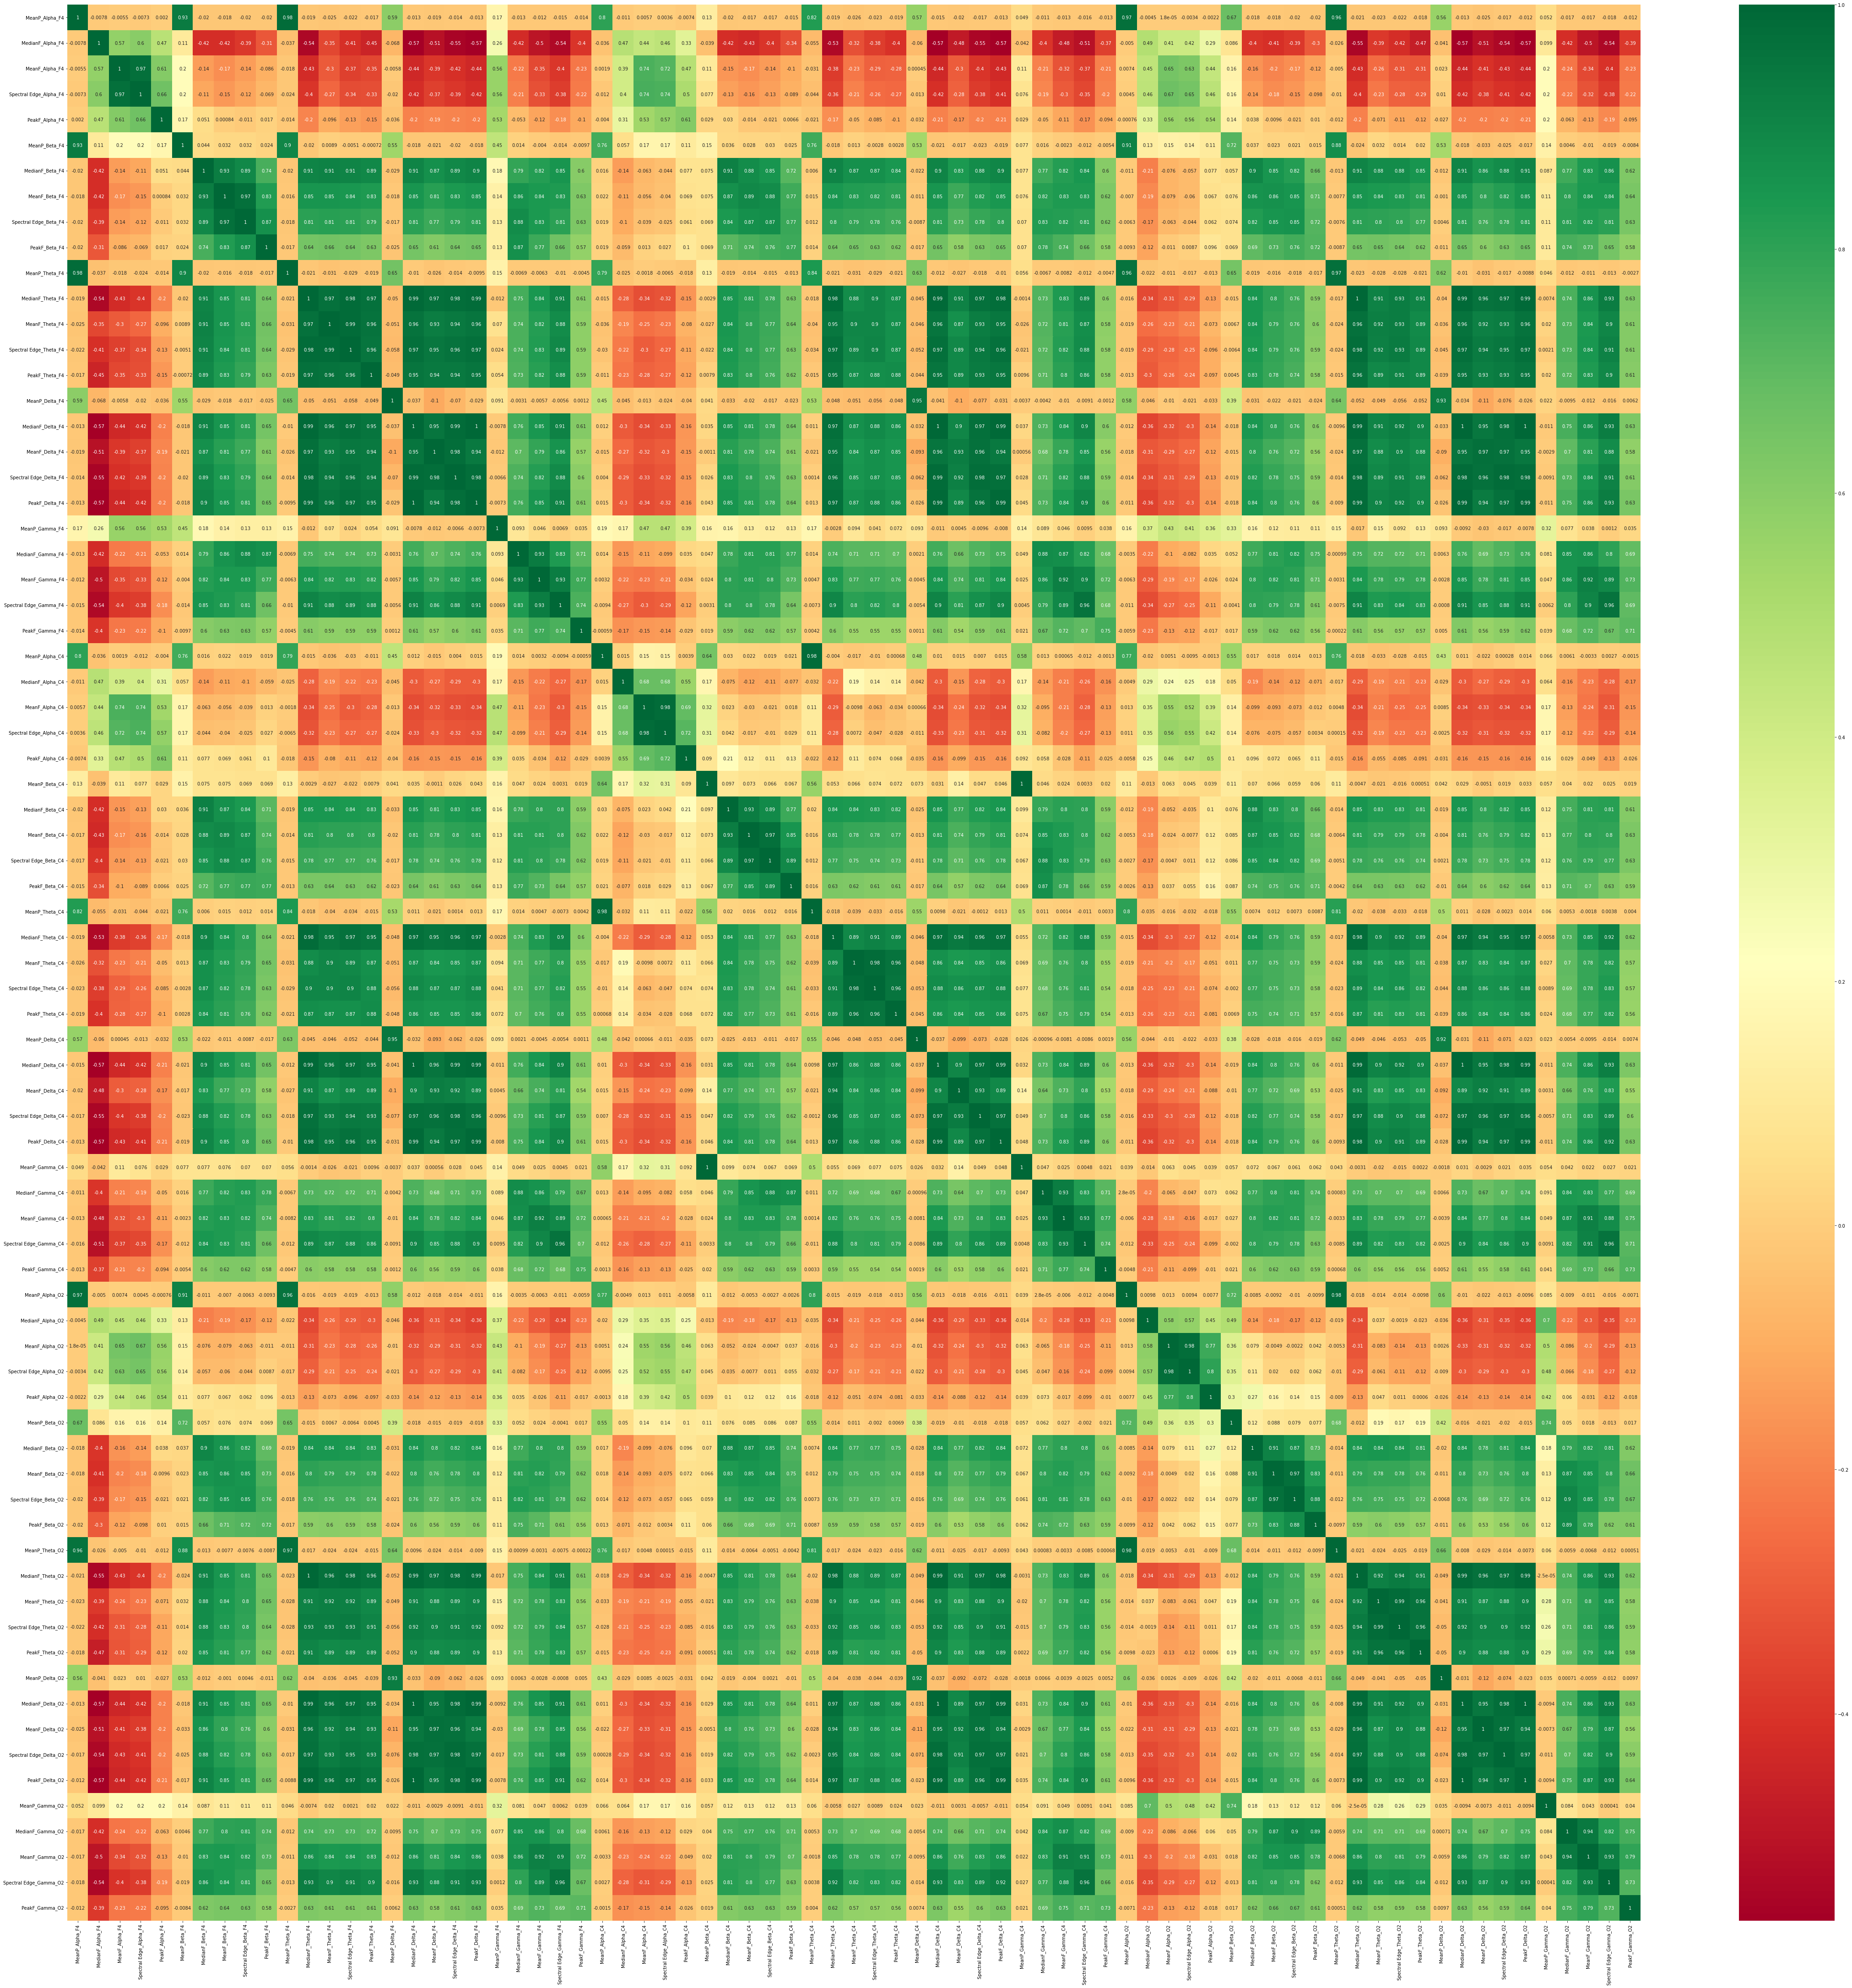

In [18]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

corr() is from panda and works on:
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation